# Machine Learning Prework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting options to display all column and row names
pd.options.display.max_columns=None
pd.options.display.max_rows=None

# 1. Act data

In [3]:
# reading act csv file
act = pd.read_csv('act_data-Copy1.csv')
act = act[act.Rtype=='S']
act['Cds'] = act['Cds'].astype(str)
act = act.dropna(thresh=9)

In [4]:
act.head()

,Year,Cds,Rtype,Sname,Dname,Cname,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21
0,2014,1612000133397,S,Granada High,Livermore Valley Joint Unified,Alameda,467.0,108.0,26.0,26.0,26.0,26.0,99.0,91.67
1,2014,1612000134536,S,Livermore High,Livermore Valley Joint Unified,Alameda,438.0,74.0,25.0,25.0,25.0,24.0,59.0,79.73
3,2014,1612340130054,S,Newark Memorial High,Newark Unified,Alameda,418.0,54.0,22.0,23.0,23.0,22.0,34.0,62.96
7,2014,1612420134668,S,James Logan High,New Haven Unified,Alameda,943.0,242.0,21.0,22.0,24.0,22.0,150.0,61.98
9,2014,1612590100065,S,Oakland Unity High,Oakland Unified,Alameda,67.0,34.0,13.0,16.0,18.0,16.0,4.0,11.76


# 2. Work on Ethnicity data

In [5]:
# reading the txt files(contains ethnicity information) into csvs
data1=pd.read_csv("ethnicity13-14.txt", delimiter="\t")
data2=pd.read_csv("ethnicity14-15.txt", delimiter="\t")
data3=pd.read_csv("ethnicity15-16.txt", delimiter="\t")
data4=pd.read_csv("ethnicity16-17.txt", delimiter="\t")
data5=pd.read_csv("ethnicity17-18.txt", delimiter="\t")

In [6]:
# adding year column to each data
data1['Year']='2014'
data2['Year']='2015'
data3['Year']='2016'
data4['Year']='2017'
data5['Year']='2018'

In [7]:
# retrieving only the necessary columns from datasets
d_list1 = [data1, data2, data3, data4, data5]
d_list2 = []
for d in d_list1:
    d = d[['Year','CDS_CODE','COUNTY','DISTRICT','SCHOOL','ETHNIC','GENDER','GR_12']]
    d_list2.append(d)

In [8]:
# concatenating all of the datasets  
ethnicity = pd.concat(d_list2)

ETHNIC: Racial/ethnic designation. This field is coded as follows:
- Code 0 = Not reported
- Code 1 = American Indian or Alaska Native, Not Hispanic
- Code 2 = Asian, Not Hispanic
- Code 3 = Pacific Islander, Not Hispanic
- Code 4 = Filipino, Not Hispanic
- Code 5 = Hispanic or Latino
- Code 6 = African American, not Hispanic
- Code 7 = White, not Hispanic
- Code 9 = Two or More Races, Not Hispanic

In [9]:
ethnicity.head()

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,GR_12
0,2014,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,2,F,0
1,2014,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,6,M,4
2,2014,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,3,M,0
3,2014,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,2,M,1
4,2014,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,4,F,0


In [10]:
#ethnicity[ethnicity['SCHOOL']== 'Berkeley Technology Academy']

In [11]:
ethnicity = pd.pivot_table(ethnicity, index=['Year', 'CDS_CODE','COUNTY','DISTRICT','SCHOOL'],
                               columns=['ETHNIC'], values='GR_12', aggfunc=np.sum).reset_index()

In [12]:
ethnicity = ethnicity.fillna(0)
ethnicity.head()

ETHNIC,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,0,1,2,3,4,5,6,7,9
0,2014,1100170109835,Alameda,Alameda County Office of Education,FAME Public Charter,1.0,0.0,11.0,1.0,1.0,8.0,1.0,24.0,0.0
1,2014,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,0.0,2.0,0.0,0.0,0.0,19.0,26.0,0.0,1.0
2,2014,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,0.0,0.0,1.0,0.0,2.0,36.0,12.0,0.0,0.0
3,2014,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,1100170124172,Alameda,Alameda County Office of Education,Yu Ming Charter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#temp.drop([0], axis=1)

# 3. Work on Low income students data

In [14]:
# reading the excel files(contains % of low income students)into csvs
frpm14 = pd.read_excel('frpm1314.xls', sheet_name='FRPM School-Level Data ', dtype='str')
frpm15 = pd.read_excel('frpm1415.xls', sheet_name='FRPM School-Level Data ', skiprows=[0], dtype='str')
frpm16 = pd.read_excel('frpm1516.xls', sheet_name='FRPM School-Level Data ', skiprows=[0], dtype='str')
frpm17 = pd.read_excel('frpm1617.xls', sheet_name='FRPM School-Level Data ', skiprows=[0], dtype='str')
frpm18 = pd.read_excel('frpm1718.xlsx', sheet_name='FRPM School-Level Data ', skiprows=[0], dtype='str')

In [15]:
frpm14.columns

Index(['Academic Year', 'County Code', 'District Code', 'School Code',
       'County Name', 'District Name', 'School Name',
       'NSLP \nProvision \n2 or 3 \nSchool ', 'Charter \nSchool \nNumber',
       'Charter \nFunding \nType', 'Low Grade', 'High Grade',
       'Enrollment\n(K-12)', 'Unadjusted\nFree Meal Count \n(K-12)',
       'Adjusted\nFree Meal Count \n(K-12)',
       'Adjusted\nPercent (%) \nEligible Free \n(K-12)',
       'Unadjusted\nFRPM \nCount \n(K-12)', 'Adjusted\nFRPM \nCount \n(K-12)',
       'Adjusted\nPercent (%) \nEligible FRPM \n(K-12)',
       'Enrollment \n(Ages 5-17)',
       'Unadjusted\nFree Meal \nCount \n(Ages 5-17)',
       'Adjusted\nFree Meal \nCount \n(Ages 5-17)',
       'Adjusted\nPercent (%) \nEligible Free  \n(Ages 5-17)',
       'Unadjusted  \nFRPM \nCount \n(Ages 5-17)',
       'Adjusted  \nFRPM \nCount \n(Ages 5-17)',
       'Adjusted\nPercent (%) Eligible FRPM \n(Ages 5-17)',
       '2013-14 \nCALPADS Fall 1 \nCertification Status'],
      dt

In [16]:
frpm14.rename(columns = {'Adjusted\nPercent (%) \nEligible FRPM \n(K-12)':'Percent (%) \nEligible FRPM \n(K-12)'}, inplace = True)
list1 = [frpm14, frpm15, frpm16, frpm17, frpm18]
list2 = []
for l in list1:
    l = l[['Academic Year','County Code', 'District Code', 'School Code','School Name','County Name','Percent (%) \nEligible FRPM \n(K-12)']]
    list2.append(l)

In [17]:
# concatenating all of the datasets  
frpm = pd.concat(list2)
# retrieving only the necessary columns from datasets
frpm.rename(columns = {'Percent (%) \nEligible FRPM \n(K-12)':'(%)FRPM'}, inplace = True)
# formatting the year column
frpm['Academic Year'] = frpm['Academic Year'].replace(to_replace=['2013-14', '2014-2015', '2015-2016','2016-2017','2017-2018'], 
                                                      value=['2014','2015','2016','2017','2018'])
frpm.rename(columns = {'Academic Year':'Year'}, inplace = True)

In [18]:
frpm.head()

,Year,County Code,District Code,School Code,School Name,County Name,(%)FRPM
0,2014,01,10017,0109835,FAME Public Charter,Alameda,0.5022522522522522
1,2014,01,10017,0112607,Envision Academy for Arts & Technology,Alameda,0.7725947521865889
2,2014,01,10017,0118489,Aspire California College Preparatory Academy,Alameda,0.6608695652173913
3,2014,01,10017,0123968,Community School for Creative Education,Alameda,0.7267441860465116
4,2014,01,10017,0124172,Yu Ming Charter,Alameda,0.10900473933649289


In [19]:
frpm['(%)FRPM'] = frpm['(%)FRPM'].astype(float)
frpm['(%)FRPM'] = frpm['(%)FRPM']*100
frpm['Cds'] = frpm['County Code'].str.lstrip('0') + frpm['District Code'] + frpm['School Code']
frpm = frpm[['Year','Cds','School Name','County Name','(%)FRPM']]
frpm.head()

,Year,Cds,School Name,County Name,(%)FRPM
0,2014,1100170109835,FAME Public Charter,Alameda,50.225225
1,2014,1100170112607,Envision Academy for Arts & Technology,Alameda,77.259475
2,2014,1100170118489,Aspire California College Preparatory Academy,Alameda,66.086957
3,2014,1100170123968,Community School for Creative Education,Alameda,72.674419
4,2014,1100170124172,Yu Ming Charter,Alameda,10.900474


In [20]:
frpm[frpm['School Name']=='Granada High']

,Year,Cds,School Name,County Name,(%)FRPM
163,2014,1612000133397,Granada High,Alameda,14.221106
4410,2014,24657302430064,Granada High,Merced,90.000000
161,2015,1612000133397,Granada High,Alameda,17.550818
4437,2015,24657302430064,Granada High,Merced,83.783784
161,2016,1612000133397,Granada High,Alameda,15.055852
4451,2016,24657302430064,Granada High,Merced,79.487179
163,2017,1612000133397,Granada High,Alameda,15.988909
4463,2017,24657302430064,Granada High,Merced,77.500000
162,2018,1612000133397,Granada High,Alameda,19.239275
4457,2018,24657302430064,Granada High,Merced,81.250000


In [21]:
lon_lat = pd.read_excel('pubschls.xlsx', skiprows=[0,1,2,3,4], dtype='str')

In [22]:
lon_lat.columns

Index(['CDSCode', 'NCESDist', 'NCESSchool', 'StatusType', 'County', 'District',
       'School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Phone', 'Ext',
       'WebSite', 'OpenDate', 'ClosedDate', 'Charter', 'CharterNum',
       'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode',
       'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual',
       'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'Latitude',
       'Longitude', 'AdmFName1', 'AdmLName1', 'AdmEmail1', 'AdmFName2',
       'AdmLName2', 'AdmEmail2', 'AdmFName3', 'AdmLName3', 'AdmEmail3',
       'LastUpDate'],
      dtype='object')

In [23]:
lon_lat = lon_lat[['CDSCode','County', 'District','School','Charter','Latitude','Longitude' ]]

In [24]:
lon_lat['CDSCode'] = lon_lat['CDSCode'].str.lstrip('0')
lon_lat.head()

,CDSCode,County,District,School,Charter,Latitude,Longitude
0,1100170000000,Alameda,Alameda County Office of Education,No Data,No Data,37.658212,-122.09713
1,1100170109835,Alameda,Alameda County Office of Education,FAME Public Charter,Y,37.521436,-121.99391
2,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Y,37.804520,-122.26815
3,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,Y,37.868991,-122.27844
4,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,Y,37.784648,-122.23863


# Merging

In [25]:
df1 = pd.merge(act, lon_lat, left_on='Cds', right_on='CDSCode', how ='inner')

In [26]:
df1.columns

Index(['Year', 'Cds', 'Rtype', 'Sname', 'Dname', 'Cname', 'Enroll12',
       'NumTstTakr', 'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci',
       'NumGE21', 'PctGE21', 'CDSCode', 'County', 'District', 'School',
       'Charter', 'Latitude', 'Longitude'],
      dtype='object')

In [27]:
df1 = df1[['Year', 'CDSCode', 'County', 'District', 'School', 'Charter', 'Latitude', 'Longitude', 'Enroll12','NumTstTakr',
           'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21']]

In [28]:
df1.head()

,Year,CDSCode,County,District,School,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21
0,2014,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,467.0,108.0,26.0,26.0,26.0,26.0,99.0,91.67
1,2015,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,454.0,114.0,25.0,25.0,26.0,25.0,95.0,83.33
2,2016,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,473.0,157.0,26.0,26.0,26.0,25.0,139.0,88.54
3,2017,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,470.0,158.0,26.0,26.0,26.0,25.0,137.0,86.71
4,2018,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,513.0,148.0,25.0,26.0,26.0,25.0,126.0,85.14


In [29]:
frpm['Year'] = frpm['Year'].astype(str)
df1['Year'] = df1['Year'].astype(str)
df2 = pd.merge(frpm, df1, left_on=['Year','Cds'], right_on=['Year','CDSCode'], how ='inner')

In [30]:
df2.columns

Index(['Year', 'Cds', 'School Name', 'County Name', '(%)FRPM', 'CDSCode',
       'County', 'District', 'School', 'Charter', 'Latitude', 'Longitude',
       'Enroll12', 'NumTstTakr', 'AvgScrEng', 'AvgScrRead', 'AvgScrMath',
       'AvgScrSci', 'NumGE21', 'PctGE21'],
      dtype='object')

In [31]:
df2 = df2[['Year', 'CDSCode', 'County', 'District', 'School','Charter', 'Latitude', 'Longitude', 'Enroll12',
       'NumTstTakr', 'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21','(%)FRPM']]

In [32]:
df2.head()

,Year,CDSCode,County,District,School,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM
0,2014,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Y,37.804520,-122.26815,48.0,18.0,16.0,15.0,17.0,16.0,1.0,5.56,77.259475
1,2014,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,Y,37.868991,-122.27844,51.0,25.0,18.0,17.0,19.0,18.0,7.0,28.00,66.086957
2,2014,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,N,37.558956,-121.96551,76.0,23.0,14.0,15.0,15.0,14.0,1.0,4.35,99.752475
3,2014,1611190106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,N,37.780753,-122.27930,41.0,20.0,26.0,26.0,27.0,25.0,17.0,85.00,23.529412
4,2014,1611190130229,Alameda,Alameda Unified,Alameda High,N,37.764958,-122.24593,428.0,114.0,25.0,24.0,25.0,24.0,94.0,82.46,22.831561


In [33]:
df2[df2['School']=='Granada High']

,Year,CDSCode,County,District,School,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM
20,2014,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,467.0,108.0,26.0,26.0,26.0,26.0,99.0,91.67,14.221106
1059,2015,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,454.0,114.0,25.0,25.0,26.0,25.0,95.0,83.33,17.550818
2152,2016,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,473.0,157.0,26.0,26.0,26.0,25.0,139.0,88.54,15.055852
3232,2017,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,470.0,158.0,26.0,26.0,26.0,25.0,137.0,86.71,15.988909
4300,2018,1612000133397,Alameda,Livermore Valley Joint Unified,Granada High,N,37.675206,-121.78984,513.0,148.0,25.0,26.0,26.0,25.0,126.0,85.14,19.239275


In [34]:
ethnicity['Year'] = ethnicity['Year'].astype(str)
ethnicity['CDS_CODE'] = ethnicity['CDS_CODE'].astype(str)
data = pd.merge(df2, ethnicity, left_on=['Year','CDSCode'], right_on=['Year','CDS_CODE'], how ='inner')

In [35]:
data.tail(20)

,Year,CDSCode,County,District,School,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,CDS_CODE,COUNTY,DISTRICT,SCHOOL,0,1,2,3,4,5,6,7,9
5336,2018,56726035635008,Ventura,Simi Valley Unified,Royal High,N,34.264414,-118.77282,471.0,52.0,25.0,24.0,23.0,25.0,41.0,78.85,35.671642,56726035635008,Ventura,Simi Valley Unified,Royal High,0.0,2.0,33.0,1.0,8.0,159.0,3.0,256.0,9.0
5337,2018,56726035636188,Ventura,Simi Valley Unified,Simi Valley High,N,34.278937,-118.68722,521.0,63.0,25.0,26.0,24.0,24.0,50.0,79.37,28.254109,56726035636188,Ventura,Simi Valley Unified,Simi Valley High,0.0,2.0,48.0,1.0,14.0,123.0,6.0,317.0,10.0
5338,2018,56726525630298,Ventura,Ventura Unified,El Camino High,N,34.277367,-119.22678,69.0,17.0,23.0,25.0,23.0,23.0,14.0,82.35,29.803922,56726525630298,Ventura,Ventura Unified,El Camino High,0.0,0.0,1.0,1.0,0.0,17.0,2.0,48.0,0.0
5339,2018,56726525630348,Ventura,Ventura Unified,Foothill Technology High,N,34.278027,-119.22675,255.0,76.0,23.0,23.0,23.0,23.0,50.0,65.79,32.567433,56726525630348,Ventura,Ventura Unified,Foothill Technology High,0.0,2.0,5.0,3.0,2.0,88.0,3.0,140.0,12.0
5340,2018,56726525630793,Ventura,Ventura Unified,Buena High,N,34.277509,-119.21715,441.0,44.0,21.0,23.0,21.0,22.0,25.0,56.82,53.862434,56726525630793,Ventura,Ventura Unified,Buena High,0.0,2.0,11.0,1.0,1.0,232.0,10.0,180.0,4.0
5341,2018,56726525637822,Ventura,Ventura Unified,Ventura High,N,34.277802,-119.26892,516.0,128.0,23.0,24.0,22.0,22.0,89.0,69.53,56.908665,56726525637822,Ventura,Ventura Unified,Ventura High,0.0,3.0,16.0,3.0,1.0,270.0,7.0,193.0,23.0
5342,2018,56737595630116,Ventura,Conejo Valley Unified,Westlake High,N,34.158871,-118.81779,515.0,191.0,27.0,27.0,26.0,26.0,170.0,89.01,19.234275,56737595630116,Ventura,Conejo Valley Unified,Westlake High,0.0,1.0,76.0,1.0,9.0,113.0,9.0,283.0,23.0
5343,2018,56737595633748,Ventura,Conejo Valley Unified,Newbury Park High,N,34.185332,-118.95398,622.0,194.0,26.0,27.0,26.0,25.0,166.0,85.57,18.913399,56737595633748,Ventura,Conejo Valley Unified,Newbury Park High,0.0,3.0,64.0,3.0,9.0,127.0,11.0,394.0,11.0
5344,2018,56737595637004,Ventura,Conejo Valley Unified,Thousand Oaks High,N,34.211003,-118.86841,598.0,151.0,26.0,26.0,26.0,25.0,131.0,86.75,24.569356,56737595637004,Ventura,Conejo Valley Unified,Thousand Oaks High,0.0,4.0,38.0,1.0,15.0,149.0,13.0,361.0,17.0
5345,2018,56738745630132,Ventura,Oak Park Unified,Oak Park High,N,34.181078,-118.76525,371.0,179.0,28.0,28.0,27.0,27.0,168.0,93.85,7.628205,56738745630132,Ventura,Oak Park Unified,Oak Park High,0.0,1.0,61.0,1.0,0.0,45.0,8.0,238.0,17.0


In [36]:
data.columns

Index([      'Year',    'CDSCode',     'County',   'District',     'School',
          'Charter',   'Latitude',  'Longitude',   'Enroll12', 'NumTstTakr',
        'AvgScrEng', 'AvgScrRead', 'AvgScrMath',  'AvgScrSci',    'NumGE21',
          'PctGE21',    '(%)FRPM',   'CDS_CODE',     'COUNTY',   'DISTRICT',
           'SCHOOL',            0,            1,            2,            3,
                  4,            5,            6,            7,            9],
      dtype='object')

In [37]:
data = data[['Year', 'CDS_CODE', 'COUNTY', 'DISTRICT', 'SCHOOL','Charter','Latitude', 'Longitude', 'Enroll12', 'NumTstTakr',
             'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21', '(%)FRPM', 0, 1, 
             2, 3, 4, 5, 6, 7, 9]]

In [38]:
data.head()

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,0,1,2,3,4,5,6,7,9
0,2014,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Y,37.804520,-122.26815,48.0,18.0,16.0,15.0,17.0,16.0,1.0,5.56,77.259475,0.0,2.0,0.0,0.0,0.0,19.0,26.0,0.0,1.0
1,2014,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,Y,37.868991,-122.27844,51.0,25.0,18.0,17.0,19.0,18.0,7.0,28.00,66.086957,0.0,0.0,1.0,0.0,2.0,36.0,12.0,0.0,0.0
2,2014,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,N,37.558956,-121.96551,76.0,23.0,14.0,15.0,15.0,14.0,1.0,4.35,99.752475,0.0,0.0,8.0,1.0,3.0,35.0,11.0,17.0,1.0
3,2014,1611190106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,N,37.780753,-122.27930,41.0,20.0,26.0,26.0,27.0,25.0,17.0,85.00,23.529412,0.0,0.0,20.0,0.0,0.0,8.0,4.0,9.0,0.0
4,2014,1611190130229,Alameda,Alameda Unified,Alameda High,N,37.764958,-122.24593,428.0,114.0,25.0,24.0,25.0,24.0,94.0,82.46,22.831561,0.0,0.0,201.0,3.0,38.0,45.0,19.0,120.0,2.0


ETHNIC: Racial/ethnic designation. This field is coded as follows:
- Code 0 = Not reported
- Code 1 = American Indian or Alaska Native, Not Hispanic
- Code 2 = Asian, Not Hispanic
- Code 3 = Pacific Islander, Not Hispanic
- Code 4 = Filipino, Not Hispanic
- Code 5 = Hispanic or Latino
- Code 6 = African American, not Hispanic
- Code 7 = White, not Hispanic
- Code 9 = Two or More Races, Not Hispanic

In [39]:
data['American Indian or Alaska Native'] = data[1]/data['Enroll12']
data['Asian'] = data[2]/data['Enroll12']
data['Pacific Islander'] = data[3]/data['Enroll12']
data['Filipino'] = data[4]/data['Enroll12']
data['Hispanic or Latino'] = data[5]/data['Enroll12']
data['African American'] = data[6]/data['Enroll12']
data['White'] = data[7]/data['Enroll12']
data['Two or More Races'] = data[9]/data['Enroll12']

In [40]:
data = data[['Year', 'CDS_CODE', 'COUNTY', 'DISTRICT', 'SCHOOL','Charter','Latitude', 'Longitude', 'Enroll12', 'NumTstTakr',
             'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21', '(%)FRPM', 
             'American Indian or Alaska Native', 'Asian', 'Pacific Islander', 'Filipino', 'Hispanic or Latino',
             'African American', 'White', 'Two or More Races']]

In [41]:
data.head()

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races
0,2014,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Y,37.804520,-122.26815,48.0,18.0,16.0,15.0,17.0,16.0,1.0,5.56,77.259475,0.041667,0.000000,0.000000,0.000000,0.395833,0.541667,0.000000,0.020833
1,2014,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,Y,37.868991,-122.27844,51.0,25.0,18.0,17.0,19.0,18.0,7.0,28.00,66.086957,0.000000,0.019608,0.000000,0.039216,0.705882,0.235294,0.000000,0.000000
2,2014,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,N,37.558956,-121.96551,76.0,23.0,14.0,15.0,15.0,14.0,1.0,4.35,99.752475,0.000000,0.105263,0.013158,0.039474,0.460526,0.144737,0.223684,0.013158
3,2014,1611190106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,N,37.780753,-122.27930,41.0,20.0,26.0,26.0,27.0,25.0,17.0,85.00,23.529412,0.000000,0.487805,0.000000,0.000000,0.195122,0.097561,0.219512,0.000000
4,2014,1611190130229,Alameda,Alameda Unified,Alameda High,N,37.764958,-122.24593,428.0,114.0,25.0,24.0,25.0,24.0,94.0,82.46,22.831561,0.000000,0.469626,0.007009,0.088785,0.105140,0.044393,0.280374,0.004673


In [42]:
col = data.loc[: , 'AvgScrEng':'AvgScrSci']
data['AvgScr'] = col.mean(axis=1)

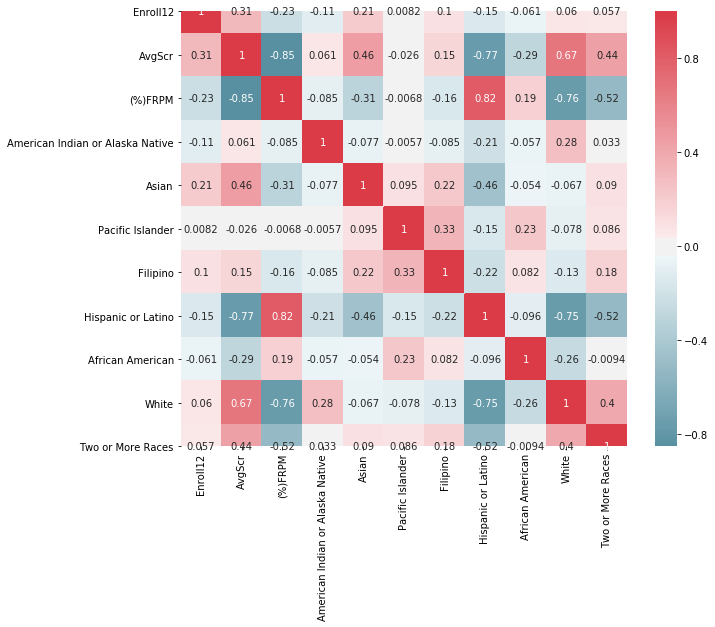

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
df = data[['Enroll12', 'AvgScr','(%)FRPM', 'American Indian or Alaska Native', 'Asian', 'Pacific Islander',
                'Filipino', 'Hispanic or Latino', 'African American', 'White', 'Two or More Races']]
corr = df.corr()
#Correlation Matrix
#corr = (corr)
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0, annot=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5356 entries, 0 to 5355
Data columns (total 26 columns):
Year                                5356 non-null object
CDS_CODE                            5356 non-null object
COUNTY                              5356 non-null object
DISTRICT                            5356 non-null object
SCHOOL                              5356 non-null object
Charter                             5356 non-null object
Latitude                            5356 non-null object
Longitude                           5356 non-null object
Enroll12                            5356 non-null float64
NumTstTakr                          5356 non-null float64
AvgScrEng                           5356 non-null float64
AvgScrRead                          5356 non-null float64
AvgScrMath                          5356 non-null float64
AvgScrSci                           5356 non-null float64
NumGE21                             5356 non-null float64
PctGE21                        

In [45]:
data[data.isna().any(axis=1)]

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr
314,2014,19647330124222,Los Angeles,Los Angeles Unified,Rise Kohyang Middle,Y,34.061106,-118.28746,0.0,66.0,17.0,19.0,19.0,18.0,17.0,25.76,75.132275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25
324,2014,19647330124818,Los Angeles,Los Angeles Unified,Los Angeles Leadership Primary Academy,Y,34.077544,-118.21182,0.0,38.0,14.0,15.0,16.0,15.0,1.0,2.63,89.140271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00
696,2014,34752830120113,Sacramento,Natomas Unified,Natomas Pacific Pathways Prep Middle,Y,38.655557,-121.54634,0.0,42.0,22.0,22.0,23.0,20.0,29.0,69.05,35.458167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.75
996,2014,48705816116255,Solano,Vallejo City Unified,Mare Island Technology Academy,Y,38.150659,-122.24556,0.0,13.0,20.0,23.0,21.0,18.0,6.0,46.15,66.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.50
1074,2015,1612590130633,Alameda,Oakland Unified,Lighthouse Community Charter,Y,37.737050,-122.19663,0.0,14.0,18.0,19.0,19.0,19.0,5.0,35.71,83.606557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.75
1297,2015,19647330106435,Los Angeles,Los Angeles Unified,Camino Nuevo Charter High,Y,34.057982,-118.25793,0.0,14.0,16.0,16.0,17.0,16.0,2.0,14.29,89.147287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.25
1354,2015,19647330124222,Los Angeles,Los Angeles Unified,Rise Kohyang Middle,Y,34.061106,-118.28746,0.0,51.0,17.0,18.0,19.0,18.0,11.0,21.57,90.123457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00
1367,2015,19647330124818,Los Angeles,Los Angeles Unified,Los Angeles Leadership Primary Academy,Y,34.077544,-118.21182,0.0,28.0,15.0,16.0,17.0,16.0,4.0,14.29,81.272085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00
1741,2015,34752830120113,Sacramento,Natomas Unified,Natomas Pacific Pathways Prep Middle,Y,38.655557,-121.54634,0.0,32.0,21.0,22.0,21.0,21.0,18.0,56.25,40.970874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.25
2041,2015,48705816116255,Solano,Vallejo City Unified,Mare Island Technology Academy,Y,38.150659,-122.24556,0.0,22.0,18.0,19.0,19.0,19.0,7.0,31.82,64.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.75


In [46]:
a = data[data['SCHOOL']=='Rise Kohyang Middle']
a

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr
314,2014,19647330124222,Los Angeles,Los Angeles Unified,Rise Kohyang Middle,Y,34.061106,-118.28746,0.0,66.0,17.0,19.0,19.0,18.0,17.0,25.76,75.132275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25
1354,2015,19647330124222,Los Angeles,Los Angeles Unified,Rise Kohyang Middle,Y,34.061106,-118.28746,0.0,51.0,17.0,18.0,19.0,18.0,11.0,21.57,90.123457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00


In [47]:
ethnicity.loc[ethnicity['SCHOOL']=='Diamond Bar High']

ETHNIC,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,0,1,2,3,4,5,6,7,9
4054,2014,19734601932862,Los Angeles,Walnut Valley Unified,Diamond Bar High,0.0,0.0,512.0,2.0,25.0,128.0,27.0,77.0,2.0
14439,2015,19734601932862,Los Angeles,Walnut Valley Unified,Diamond Bar High,0.0,0.0,466.0,6.0,23.0,133.0,20.0,71.0,7.0
24867,2016,19734601932862,Los Angeles,Walnut Valley Unified,Diamond Bar High,0.0,0.0,482.0,5.0,28.0,108.0,27.0,87.0,6.0
35334,2017,19734601932862,Los Angeles,Walnut Valley Unified,Diamond Bar High,0.0,0.0,454.0,4.0,31.0,140.0,15.0,84.0,10.0
45814,2018,19734601932862,Los Angeles,Walnut Valley Unified,Diamond Bar High,3.0,0.0,512.0,5.0,30.0,145.0,20.0,84.0,12.0


In [48]:
data = data.drop([268,314,324,696,996,1074,1297,1354,1367,1741,2041])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5345 entries, 0 to 5355
Data columns (total 26 columns):
Year                                5345 non-null object
CDS_CODE                            5345 non-null object
COUNTY                              5345 non-null object
DISTRICT                            5345 non-null object
SCHOOL                              5345 non-null object
Charter                             5345 non-null object
Latitude                            5345 non-null object
Longitude                           5345 non-null object
Enroll12                            5345 non-null float64
NumTstTakr                          5345 non-null float64
AvgScrEng                           5345 non-null float64
AvgScrRead                          5345 non-null float64
AvgScrMath                          5345 non-null float64
AvgScrSci                           5345 non-null float64
NumGE21                             5345 non-null float64
PctGE21                        

In [50]:
#exporting data
data.to_csv('ml_data.csv', index = False)